### Evaluating the m5 limits ###

Create "table 2" and "figure 4", from the overview paper.

This uses fiducial construction numbers for the seeing and skybrightness.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import syseng_throughputs as st

In [2]:
pd.set_option('display.precision', 3)

In [3]:
# Read bandpass information.
defaultDirs = st.setDefaultDirs()
addLosses = True
# Use the X=1.0 atmosphere!
atmosphere = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='atmos_10_aerosol.dat')
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses, atmosphereOverride=atmosphere)

In [4]:
# Standard LSST visits, standard LSST readnoise and 1 visit = 15s x 2exp
m5_std = st.makeM5(hardware, system, exptime=15, nexp=2, readnoise=8.8, othernoise=0, darkcurrent=0.2)
m5_std

,FWHMeff,FWHMgeom,skyMag,skyCounts,Zp_t,Tb,Sb,kAtm,gamma,Cm,dCm_infinity,dCm_double,m5,sourceCounts,m5_fid,m5_min
u,0.92,0.808,22.951,75.582,26.943,0.034,0.054,0.506,0.038,23.116,0.600,0.381,23.795,545.047,23.9,23.4
g,0.87,0.767,22.265,426.700,28.427,0.132,0.161,0.216,0.039,24.457,0.171,0.090,24.853,806.237,25.0,24.6
r,0.83,0.734,21.200,842.233,28.189,0.106,0.119,0.127,0.039,24.465,0.094,0.046,24.380,1001.868,24.7,24.3
i,0.80,0.710,20.469,1260.849,27.927,0.083,0.091,0.096,0.039,24.380,0.064,0.031,23.970,1147.758,24.0,23.6
z,0.78,0.693,19.599,1921.929,27.542,0.059,0.062,0.069,0.039,24.225,0.043,0.020,23.407,1352.202,23.3,22.9
y,0.76,0.677,18.598,2368.047,26.667,0.026,0.031,0.169,0.039,23.746,0.035,0.016,22.455,1450.862,22.1,21.7


In [5]:
# Now also use X=1.2 atmosphere.
defaultDirs = st.setDefaultDirs()
addLosses = True
atmosphere = st.readAtmosphere(defaultDirs['atmosphere'], atmosFile='pachonModtranAtm_12_aerosol.dat')
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses, atmosphereOverride=atmosphere)
# Calculate degraded seeing values (have to increase FWHM from default values)

# And calculate m5 for a standard visit. 
m5_X = st.makeM5(hardware, system, exptime=15, nexp=2, readnoise=8.8, othernoise=0, darkcurrent=0.2, X=1.2)

In [6]:
# Add degradation of m5 when X=1.2 into m5_std columns (dCm_double for double visit time already there)
m5_std['m5_1.2'] = m5_X['m5']
m5_std['dM5_1.2'] = m5_std['m5'] - m5_X['m5']

In [7]:
cols = m5_std.columns
cols = ['skyMag', 'FWHMgeom', 'FWHMeff', 'gamma', 'kAtm', 'Cm', 'm5', 'dCm_infinity', 'dCm_double', 'dM5_1.2']
m5_std[cols].T

,u,g,r,i,z,y
skyMag,22.951,22.265,21.200,20.469,19.599,18.598
FWHMgeom,0.808,0.767,0.734,0.710,0.693,0.677
FWHMeff,0.920,0.870,0.830,0.800,0.780,0.760
gamma,0.038,0.039,0.039,0.039,0.039,0.039
kAtm,0.506,0.216,0.127,0.096,0.069,0.169
Cm,23.116,24.457,24.465,24.380,24.225,23.746
m5,23.795,24.853,24.380,23.970,23.407,22.455
dCm_infinity,0.600,0.171,0.094,0.064,0.043,0.035
dCm_double,0.381,0.090,0.046,0.031,0.020,0.016
dM5_1.2,0.216,0.160,0.142,0.133,0.130,0.140


In [8]:
print(m5_std[cols].T.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &       u &       g &       r &       i &       z &       y \\
\midrule
skyMag       &  22.951 &  22.265 &  21.200 &  20.469 &  19.599 &  18.598 \\
FWHMgeom     &   0.808 &   0.767 &   0.734 &   0.710 &   0.693 &   0.677 \\
FWHMeff      &   0.920 &   0.870 &   0.830 &   0.800 &   0.780 &   0.760 \\
gamma        &   0.038 &   0.039 &   0.039 &   0.039 &   0.039 &   0.039 \\
kAtm         &   0.506 &   0.216 &   0.127 &   0.096 &   0.069 &   0.169 \\
Cm           &  23.116 &  24.457 &  24.465 &  24.380 &  24.225 &  23.746 \\
m5           &  23.795 &  24.853 &  24.380 &  23.970 &  23.407 &  22.455 \\
dCm\_infinity &   0.600 &   0.171 &   0.094 &   0.064 &   0.043 &   0.035 \\
dCm\_double   &   0.381 &   0.090 &   0.046 &   0.031 &   0.020 &   0.016 \\
dM5\_1.2      &   0.216 &   0.160 &   0.142 &   0.133 &   0.130 &   0.140 \\
\bottomrule
\end{tabular}



/var/folders/tr/bjzqy0h17kx31fhndw6050d80000gn/T/ipykernel_69421/250016753.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(m5_std[cols].T.to_latex())


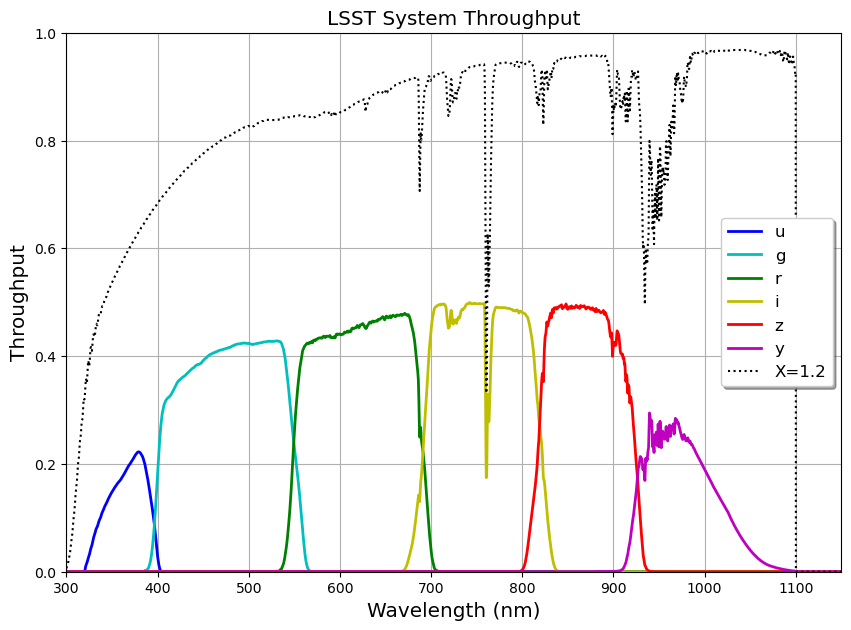

In [9]:
# Generate the plot for Figure 4, using X=1.2
plt.figure(figsize=(10, 7))
st.plotBandpasses(system, title='LSST System Throughput', addlegend=False, newfig=False)
plt.plot(atmosphere.wavelen, atmosphere.sb, 'k:', label='X=1.2')
plt.ylabel("Throughput")
plt.legend(loc='right', numpoints=1, fancybox=True, shadow=True, fontsize='large')
#plt.savefig('Figure4.pdf', format='pdf')